In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_a(deg_true):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    
    Returns:
    a: (np array of size (deg_true + 1)) coefficients of polynomial g
    """
    return 5 * np.random.randn(deg_true + 1)

def get_design_mat(x, deg):
    """
    Inputs:
    x: (np.array of size N)
    deg: (int) max degree used to generate the design matrix
    
    Returns:
    X: (np.array of size N x (deg_true + 1)) design matrix
    """
    X = np.array([x ** i for i in range(deg + 1)]).T
    return X

def draw_sample(deg_true, a, N):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """    
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a
    return x, y

def draw_sample_with_noise(deg_true, a, N):  
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """  
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a + np.random.randn(N)
    return x, y

### Question 7

In [3]:
def get_least_square_estimator(X, y):
    N=X.shape[0]
    d=X.shape[1]-1
    if N<=d:
        raise Exception("N <= d")
    XTX = np.linalg.inv(np.matmul(X.T,X))
    w = np.linalg.multi_dot([XTX, X.T, y])
    return w

### Question 8

In [4]:
def emperical_risk(X, y, b):
  N = X.shape[0]
  r = np.linalg.norm((np.matmul(X,b)-y))**2/N
  return r


### Question 9

In [10]:
a = np.array([[1,2],[1,2]])
w = np.array([[1,2],[1,2]])
np.inner(a, w)
a@w

array([[3, 6],
       [3, 6]])

In [13]:
deg_true = 2
a = get_a(deg_true)
draw_sample(deg_true, a, 10)

(array([0.03868916, 0.27550706, 0.3819461 , 0.38465024, 0.50247708,
        0.65922339, 0.6799576 , 0.73449023, 0.75826513, 0.7704888 ]),
 array([11.97305975, 12.62545545, 12.79693683, 12.80030998, 12.89996553,
        12.88913053, 12.87543545, 12.82573971, 12.79787004, 12.78207483]))

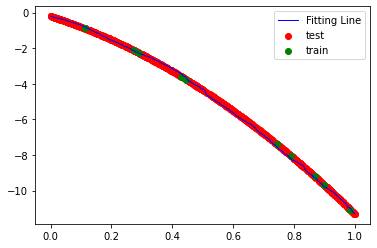

In [10]:
deg_true = 2
# get train test
a = get_a(deg_true)
X_train, y_train = draw_sample(deg_true, a, 10)
X_test, y_test = draw_sample(deg_true, a, 1000)
# get design_mat
max_degree = 5
design_mat_train = get_design_mat(X_train, max_degree)
design_mat_test = get_design_mat(X_test, max_degree)
# LSE
param = get_least_square_estimator(design_mat_train, y_train)
EMR = emperical_risk(design_mat_test, y_test, param)


plt.scatter(X_test,y_test,color="red",label="test",linewidth=1)
plt.scatter(X_train,y_train,color="green",label="train",linewidth=1)
x = np.linspace(0,1,1000)
y = np.matmul(get_design_mat(X_test, len(param)-1), param)
plt.plot(x,y,color="blue",label="Fitting Line",linewidth=1)
plt.legend()
plt.show()  

### Question 10

In [6]:
for max_degree in range(1,10):
  # get design_mat
  design_mat_train = get_design_mat(X_train, max_degree)
  design_mat_test = get_design_mat(X_test, max_degree)
  # LSE
  param = get_least_square_estimator(design_mat_train, y_train)
  EMR = emperical_risk(design_mat_test, y_test, param)
  print('d =', max_degree, EMR)

d = 1 0.4619325849999339
d = 2 5.321590006276538e-27
d = 3 9.981715536084532e-26
d = 4 5.63691819602469e-23
d = 5 6.919696216420662e-19
d = 6 7.410002638778764e-16
d = 7 7.489413496275361e-12
d = 8 0.00023162043342085507
d = 9 8.91544238268685


#### The minimum is when d=2

### Question 11

In [7]:
deg_true = 2
# get train test
a = get_a(deg_true)

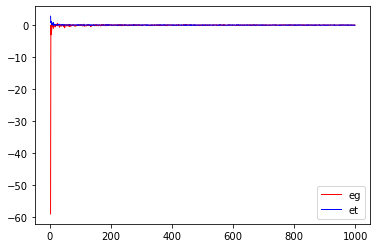

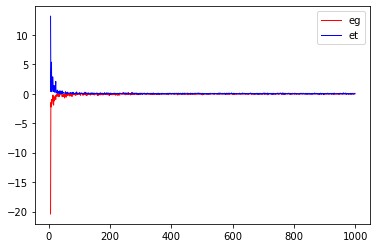

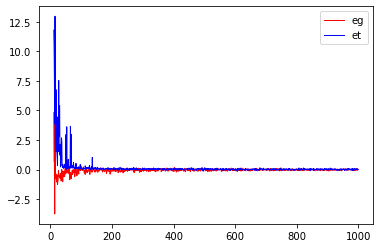

In [8]:
for max_degree in [2,5,10]:
  xAxis=[]
  et=[]
  eg=[]
  for N in range(max_degree+1,1000):
    X_train, y_train = draw_sample_with_noise(deg_true, a, N)
    X_test, y_test = draw_sample_with_noise(deg_true, a, 1000)
    design_mat_train = get_design_mat(X_train, max_degree)
    design_mat_test = get_design_mat(X_test, max_degree)
    param = get_least_square_estimator(design_mat_train, y_train)
    xAxis.append(N)
    et.append(emperical_risk(design_mat_train, y_train, param))
    eg.append(emperical_risk(design_mat_test, y_test, param))
  
  plt.plot(xAxis,np.log(et),color="red",label="eg",linewidth=1)
  plt.plot(xAxis,np.log(eg),color="blue",label="et",linewidth=1)
  plt.legend()
  plt.show() 

### Question 12

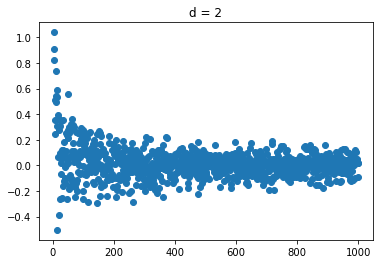

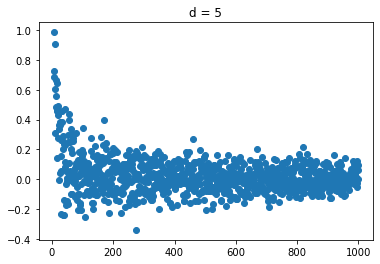

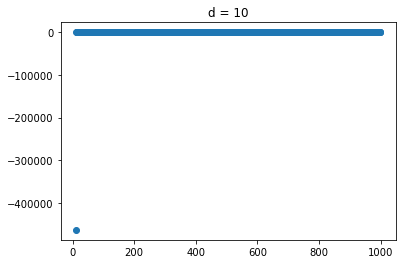

In [9]:
for max_degree in [2,5,10]:
  xAxis=[]
  estimate_error = []
  for N in range(max_degree+1,1000):
    X_train, y_train = draw_sample_with_noise(deg_true, a, N)
    X_test, y_test = draw_sample_with_noise(deg_true, a, 1000)
    design_mat_train = get_design_mat(X_train, max_degree)
    design_mat_test = get_design_mat(X_test, max_degree)
    param_train = get_least_square_estimator(design_mat_train, y_train)
    param_test = get_least_square_estimator(design_mat_test, y_test)
    er_train = emperical_risk(design_mat_train, y_train ,param_train)
    er_test = emperical_risk(design_mat_test, y_test ,param_test)
    xAxis.append(N)
    estimate_error.append(er_test-er_train) 
  plt.scatter(xAxis,estimate_error)
  plt.title('d = {}'.format(max_degree))
  plt.show()

### Question 13

From Plot 2 we find: when N decrease or d increase, generalization error increase

From Plot 3 we find: when d increase, N effect more on estimate error. When N decrease, estimate error increase

### Question 14

The optimization error is always 0 because the best function we learned from get_a and least square estimator are same

#### Name: Siyong Liu
#### Netid: sl9404